In [6]:
import logging
from IPython.display import display, clear_output
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
plt.style.use('bmh')

plt.rc('font', size=14, family="Barlow")

def initialize_figure(w: int = 14, h: int = 10) -> any:
  return plt.subplots(figsize=(w, h))

In [7]:
df = pd.read_csv("../data/truncated/fire_occurence_sample_50k.csv")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs="EPSG:4326")
tif_file = "../data/maps/NE1_50M_SR_W/NE1_50M_SR_W.tif"
world = gpd.read_file("../data/maps/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")

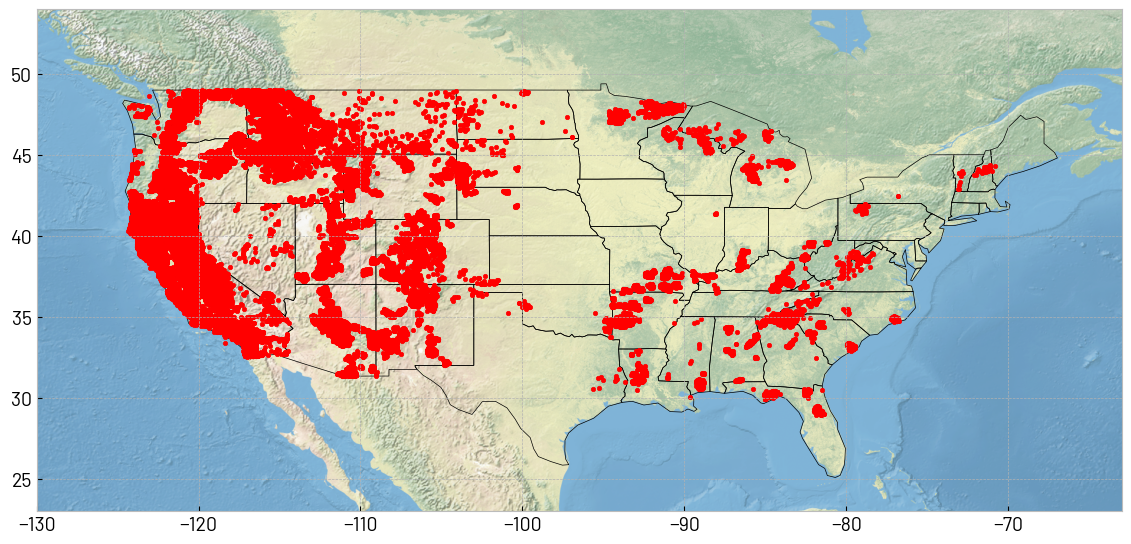

In [8]:
fig, ax = initialize_figure(14, 10)


world.plot(ax=ax, color="#00000000", edgecolor='black')
with rasterio.open(tif_file) as src:
    show(src, ax=ax)
gdf.plot(ax=ax, color='red', markersize=10)

# Coordinate range for contiguous US
ax.set_xlim([-130, -63])
ax.set_ylim([23, 54])
ax.set_aspect('equal', adjustable='box')

plt.show()

In [46]:
df

,Unnamed: 0,X,Y,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,...,LATDD83,LONGDD83,FIRETYPECATEGORY,POINTTYPE,PERIMEXISTS,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE
0,168985,-112.110185,35.947313,231223994,NaN,NaN,,1994/02/01 00:00:00+00,Charley,NaN,...,35.94731,-112.11018,WF,Ignition,N,,307,2024/09/24 04:02:58+00,NaN,NaN
1,510692,-120.056111,37.053889,231567915,{470A053C-E7F1-4A0C-BB14-5369898FA0EC},NaN,NaN,2019/01/02 00:00:00+00,AVE 21 / RD 27,NaN,...,37.05389,-120.05611,WF,Unknown,N,No,5,2024/09/24 04:09:10+00,NaN,NaN
2,243415,-84.150000,36.683333,231298424,NaN,NaN,NaN,2019/01/02 00:00:00+00,NaN,NaN,...,36.68333,-84.15000,WF,,,,802,2024/09/24 04:04:10+00,NaN,NaN
3,511795,-116.904722,34.274722,231569018,{953FC30A-92F3-4900-A564-23AD91FB14AE},NaN,NaN,2019/01/02 00:00:00+00,FAWNSKIN/FAWNSKIN #4,NaN,...,34.27472,-116.90472,WF,Unknown,N,No,5,2024/09/24 04:09:12+00,NaN,NaN
4,532246,-121.359017,38.977383,231589469,{19F34B18-AFC5-492A-AA09-B0EF9EB05376},NaN,NaN,2019/01/02 00:00:00+00,Unknown,NaN,...,38.97738,-121.35902,WF,Unknown,N,No,5,2024/09/24 04:09:47+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,330547,-121.413685,47.332906,231386842,{59401E11-43BC-4708-B608-FF9D65F596F6},NaN,NaN,2022/10/13 00:00:00+00,UNNAMED,NaN,...,47.33291,-121.41369,WF,Ignition,N,NaN,6,2024/09/24 04:05:51+00,NaN,NaN
49995,229197,-119.898889,39.586389,231284206,{E32062F9-1F6A-4C7C-9454-327CEFD852CD},NaN,NaN,2019/01/02 00:00:01+00,HOGE,NaN,...,39.58639,-119.89889,WF,Ignition,,NaN,417,2024/09/24 04:03:58+00,NaN,NaN
49996,403322,-117.590350,34.469850,231460025,{1F87D98D-730E-4D88-A34C-63106511C32F},NaN,NaN,2019/01/02 00:00:00+00,Unknown,NaN,...,34.46985,-117.59035,WF,Unknown,N,No,5,2024/09/24 04:06:34+00,NaN,NaN
49997,157395,-111.490853,34.788582,231212404,{1EE9F65A-7A0A-46E2-AA4A-80DF1BABCCEB},3A1A7CF3-80C5-4273-8A77-C92E7CFE0324,41751,2017/01/24 00:00:00+00,Unknown,NaN,...,34.78858,-111.49085,WF,Unknown,,,304,2024/09/24 04:02:50+00,NaN,NaN
